<a href="https://colab.research.google.com/github/anaPK6/Health-Cost-Analysis-and-Optimization/blob/main/Healthcare_Cost_Analysis_and_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/insurance.csv'
insurance_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(insurance_data.head())

# Basic preprocessing steps
# Convert categorical variables to numerical using one-hot encoding
insurance_data = pd.get_dummies(insurance_data, drop_first=True)

# Check for any missing values
print(insurance_data.isnull().sum())

# There should be no missing values in this dataset, as it's clean



   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


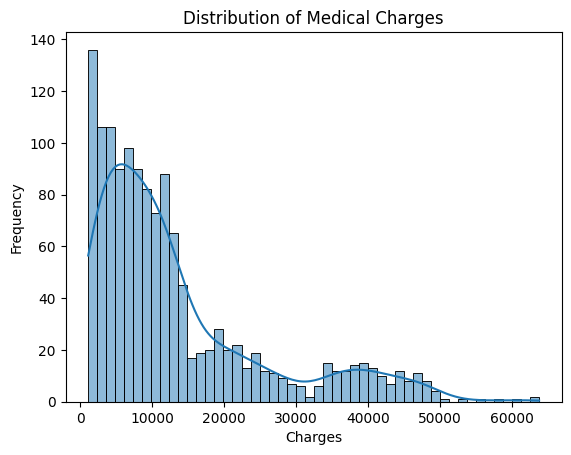

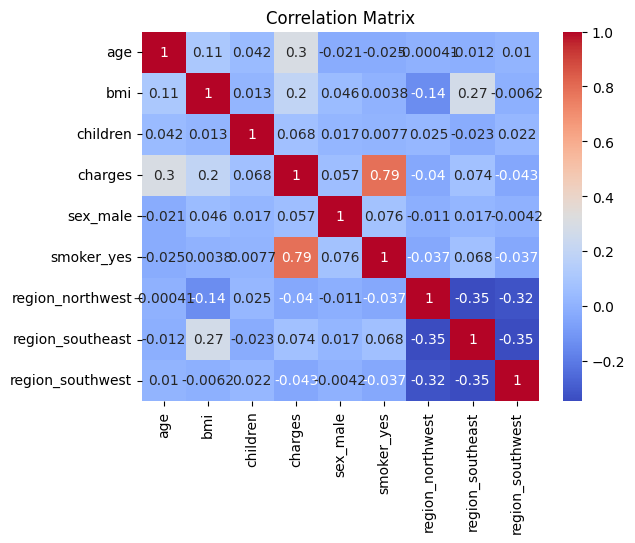

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(insurance_data.describe())

# Distribution of charges (Total expenditure)
sns.histplot(insurance_data['charges'], bins=50, kde=True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
corr_matrix = insurance_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Select features and target variable
features = insurance_data.drop(columns=['charges'])
target = insurance_data['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


MAE: 2550.0784706115096
RMSE: 4576.299916157115


In [ ]:
from scipy.optimize import linprog

# Define the cost coefficients (costs of treatments)
costs = [5000, 10000, 15000]  # Cost for Treatment A, B, and C

# Define the constraints
# Constraint 1: Total patient care contribution must be at least 100
care_contributions = [3, 4, 5]  # Contribution to patient care by each treatment
care_requirement = 100

# Constraint 2: Total cost must be within the budget
budget = 500000

# Coefficients for inequality constraints
A = [
    [-3, -4, -5],  # Coefficients for patient care contribution (negative for 'greater than' constraint)
    [5000, 10000, 15000]  # Coefficients for cost (budget constraint)
]
b = [-care_requirement, budget]  # Right-hand side values for the constraints (negative for 'greater than' constraint)

# Bounds for decision variables (number of treatments, cannot be negative)
x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (0, None)

# Solve the linear programming problem
result = linprog(costs, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds, x2_bounds], method='highs')

print('Optimal solution (number of treatments A, B, C):', result.x)
print('Minimum cost:', result.fun)


Optimal solution (number of treatments A, B, C): [33.33333333  0.          0.        ]
Minimum cost: 166666.6666666667
